In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Análisis de Spotify
Preguntas interesantes para considerar:
- El objetivo es poder estimar si un tema nuevo del gusto de la persona que tiene esta playlist activa. En este caso la variable label corresponde a nuestra variable de salida a analizar

In [2]:
# Análisis exploratorio inicial
playlist = pd.read_csv('data_playlist.csv')
playlist.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [8]:
# Vemos primero el tipo de información que tiene cada variable
print("columnas, filas: ", playlist.shape, "\n")
playlist.info()

columnas, filas:  (750, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


De `.info()` podemos sacar que:
- No existen valores no nulos, por lo tanto, no habría que rellenarlos.
- Todos los features son numéricos, aunque no podríamos especificar el tipo todavía.

#### Acousticness

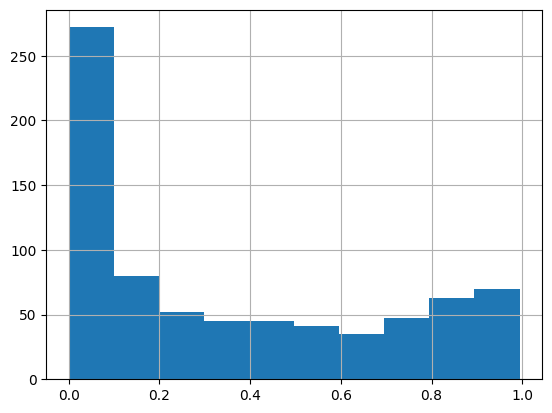

In [20]:
playlist.acousticness.hist();

- Valores continuos entre 0 y 1.
- La mayoría de los valores son bajos.
- A priori, no tiene una fistribución conocida.

#### Danceability

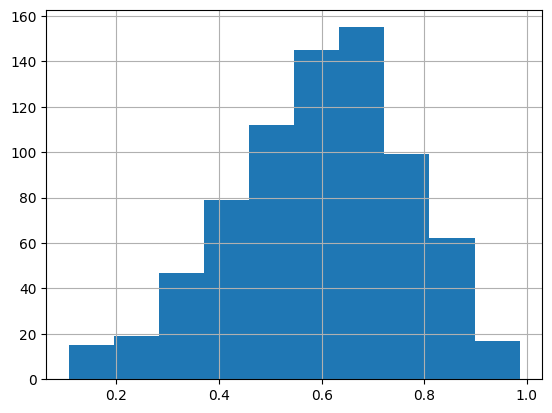

In [22]:
playlist.danceability.hist();

- Valores continuos entre 0 y 1.
- Tiene skewness.

#### Duration

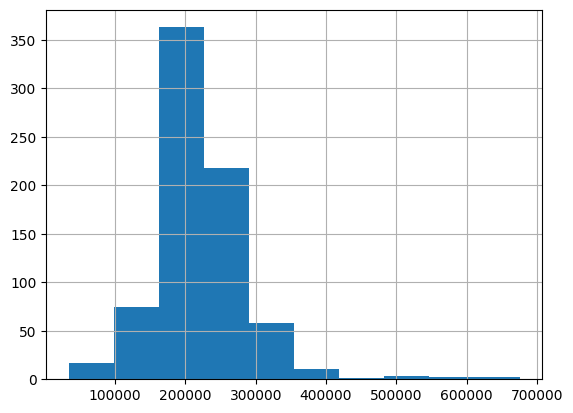

In [24]:
playlist.duration.hist();

#### Energy

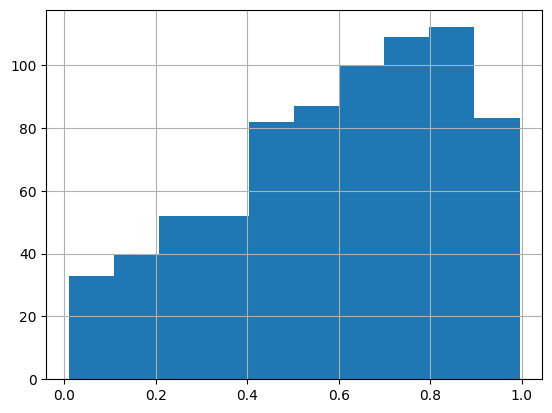

In [27]:
playlist.energy.hist();

#### Instrumentalness

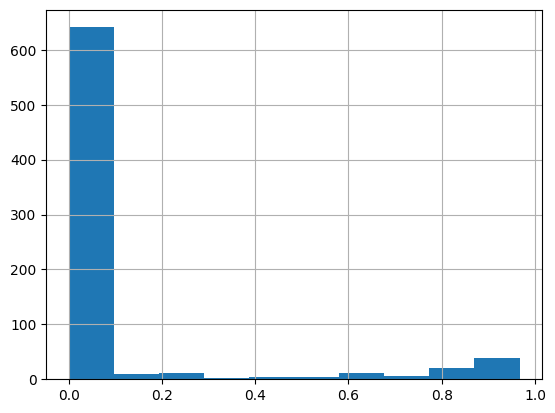

In [29]:
playlist.instrumentalness.hist();

#### Key

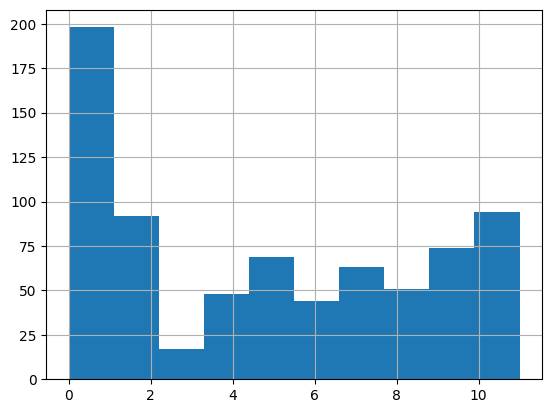

In [31]:
playlist.key.hist();

In [46]:
playlist.key.value_counts()

0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: key, dtype: int64

#### Liveness

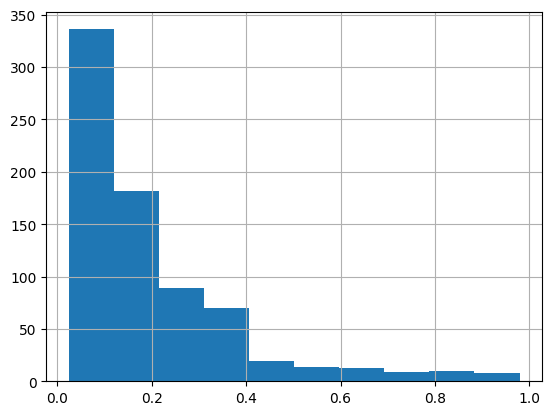

In [32]:
playlist.liveness.hist();

#### Loudness

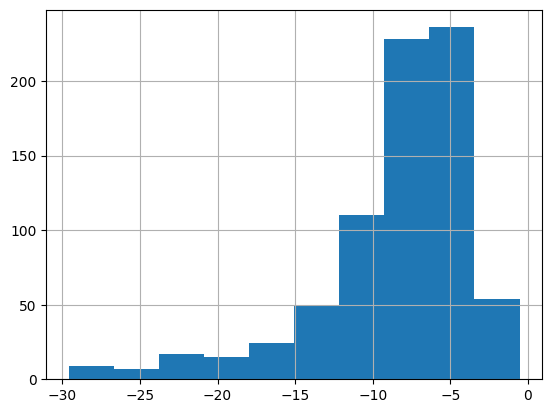

In [33]:
playlist.loudness.hist();

#### Mode

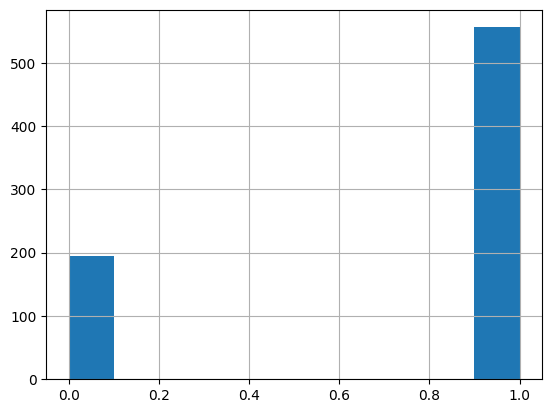

In [36]:
playlist['mode'].hist();

In [48]:
playlist['mode'].value_counts()

1    556
0    194
Name: mode, dtype: int64

#### Speechiness

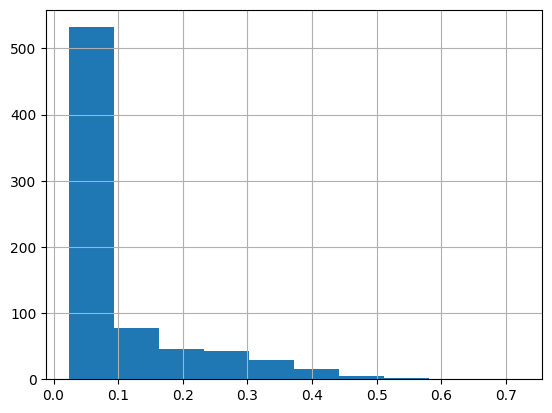

In [38]:
playlist.speechiness.hist();

#### Tempo

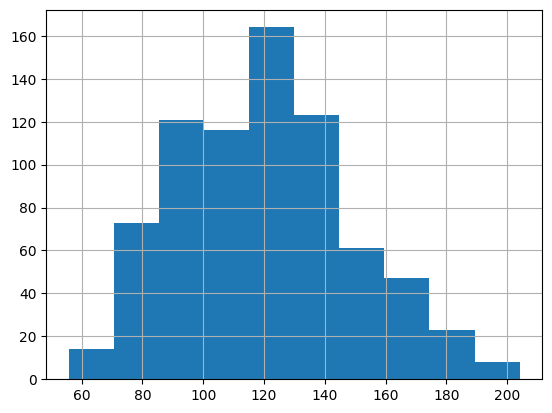

In [39]:
playlist.tempo.hist();

#### Time Signature

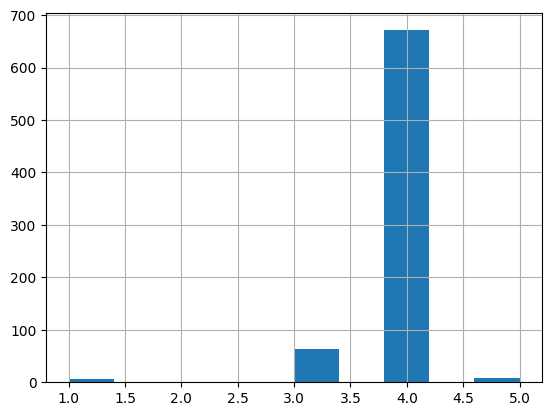

In [41]:
playlist.time_signature.hist();

In [49]:
playlist.time_signature.value_counts()

4    671
3     64
5      9
1      6
Name: time_signature, dtype: int64

#### Valence

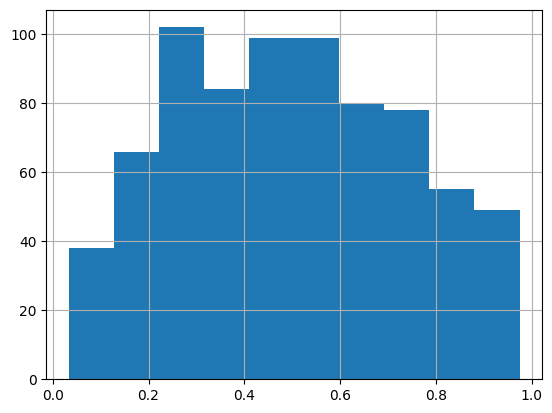

In [42]:
playlist.valence.hist();

#### Label

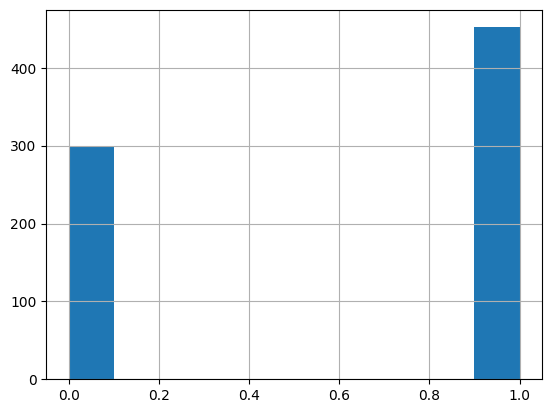

In [44]:
playlist.label.hist();

In [51]:
playlist.label.value_counts()

1    452
0    298
Name: label, dtype: int64

- No se encuentra balanceado el label.

### Identificación por tipo

In [45]:
playlist.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [71]:
numericas = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categoricas = ['key', 'mode', 'time_signature']

In [83]:
playlist[numericas].skew().sort_values()

loudness           -1.693115
energy             -0.458765
danceability       -0.311981
valence             0.104812
tempo               0.334763
acousticness        0.534804
duration            1.576231
speechiness         2.040370
liveness            2.156240
instrumentalness    2.488166
dtype: float64

### Identificación de variables

In [52]:
# Variables de entrada
entrada = playlist.drop('label', axis=1)
salida = playlist.label